In [ ]:
# -*- coding: utf-8 -*-
"""
Proyecto Final - Física Computacional

Valentina Campos Aguilar
Luis Alfredo Guerrero Camacho 
Wagner Bermudez Ordóñez
Sebastián Jimenez Carranza

ELECTRÓN CONFINADO EN POZO DE POTENCIAL INFINITO
"""
#Se importan las bibliotecas necesarias para llevar a cabo el método escogido. 
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display

#Se definen las dimensiones x y y del pozo.
Lx = 5
Ly = 5

'''Se crea una función que permite aproximar el valor de la función de onda para un estado energético dado en el espacio x-y que esta quiera analizarse. 
La misma tiene como parámetros:
- El arreglo de posiciones en x
- El arrdglo de posiciones en y
- Nivel energético en x
- Nivel energético en y 
Esta retornara el valor que se aproximó para la función de onda para las condiciones dadas. '''

def AproxPsi(x, y, nx, ny):
    #Se inicializa el valor de la función de onda en cero.
    valorAproxPsi = 0
    #Se calcula el valor del coeficiente que acompaña a la función de onda en términos de las dimenos x y y del pozo.
    coeficiente = (4/(Lx*Ly))**1/2
    #Se define la exresión matemática que permite hallar el valor aproximado de la función de onda. 
    valorAproxPsi = (coeficiente*np.sin(x*nx*np.pi/Lx)*np.sin(y*ny*np.pi/Ly))
    return valorAproxPsi


'''Se crea una función que calcula la función de onda para una malla de dimensión xy, con parámetros:
-Estado energético nx 
-Estado energético ny
Estos parámetros serán definidos por el usuario a través de interactividad. 
La función retornará las gráficas de la función de onda y distribución de probabilidad en función de la malla de dimensiones definida.'''

def Interactivo(nx, ny):

    #Se define el número de puntos de posición en x y y que tendrá la malla. 
    xpuntos = 100
    ypuntos = 100

    #Se crean los arreglos de posición y tiempo con los límites y cantidad de puntos respectivos de ambas magnitudes. 
    x = np.linspace(0, Lx, xpuntos) 
    y = np.linspace(0, Ly, ypuntos)

    #Se crea la malla de dimensión xy. 
    X, Y = np.meshgrid(x,y)


    #Se calcula la función de onda llamando a la función que permite aproximar la misma con la malla dimensional y estados energéticos definidos por el usuario.
    FO = AproxPsi(X, Y, nx, ny)
    Dist_Prob = FO**2
   
    #Se crea un gráfico de superficie que permite visualizar la aproximación de la función de onda en función de la malla espacial que caracteriza el pozo infinito.
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel('x [m]')
    ax.set_ylabel('y [m]')
    ax.set_zlabel('$\Psi(x,y)$')
    ax.plot_surface(X, Y, FO, rstride=1, cstride=1,
                    cmap='cividis', edgecolor='none')
    ax.set_title('Gráfico \n Aproximación de la Función de Onda en función de la posición')
    plt.show()

    #Se crea un gráfico de superficie para obtener la distribución de probabilidad que seguirá el movimiento del electrón dentro del pozo infinito.
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel('x [m]')
    ax.set_ylabel('y [m]')
    ax.set_zlabel('|$\Psi(x,y)$)|^2')
    ax.plot_surface(X, Y, Dist_Prob, rstride=1, cstride=1,
                    cmap='cividis', edgecolor='none')
    ax.set_title('Gráfico \n Distribución de Probabilidad para el movimiento del electrón confinado en el pozo infinito')
    plt.show()


    #Se crea un gráfico de contorno para visualizar la densidad de probabilidad de encontrar el electrón en el pozo infinito definido.
    plt.figure(figsize=(10,6))
    plt.scatter(X, Y, c=Dist_Prob,cmap = 'jet')
    d = plt.colorbar()
    d.set_label('|$\Psi(x,y)$)|^2')
    plt.title('Gráfico de Contorno \n Densidad de Probabilidad del electrón confinado')
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    plt.show()

y=interactive(Interactivo,{'manual': True}, nx=widgets.IntSlider(min=1, max=5, step=1, value=1), ny=widgets.IntSlider(min=1, max=5, step=1, value=1))
display(y)

interactive(children=(IntSlider(value=1, description='nx', max=5, min=1), IntSlider(value=1, description='ny',…

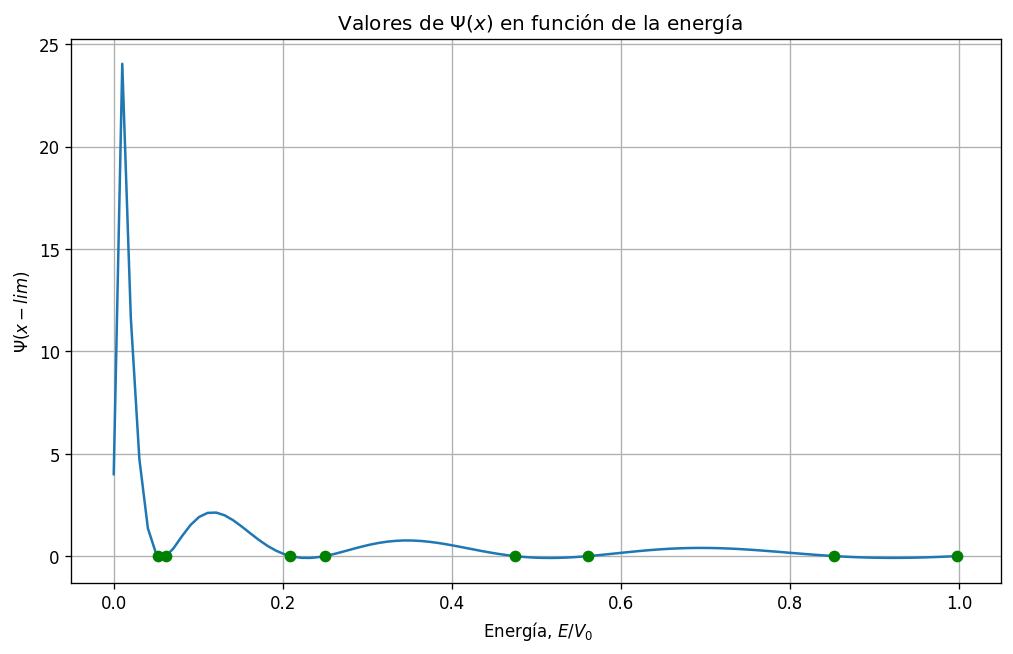

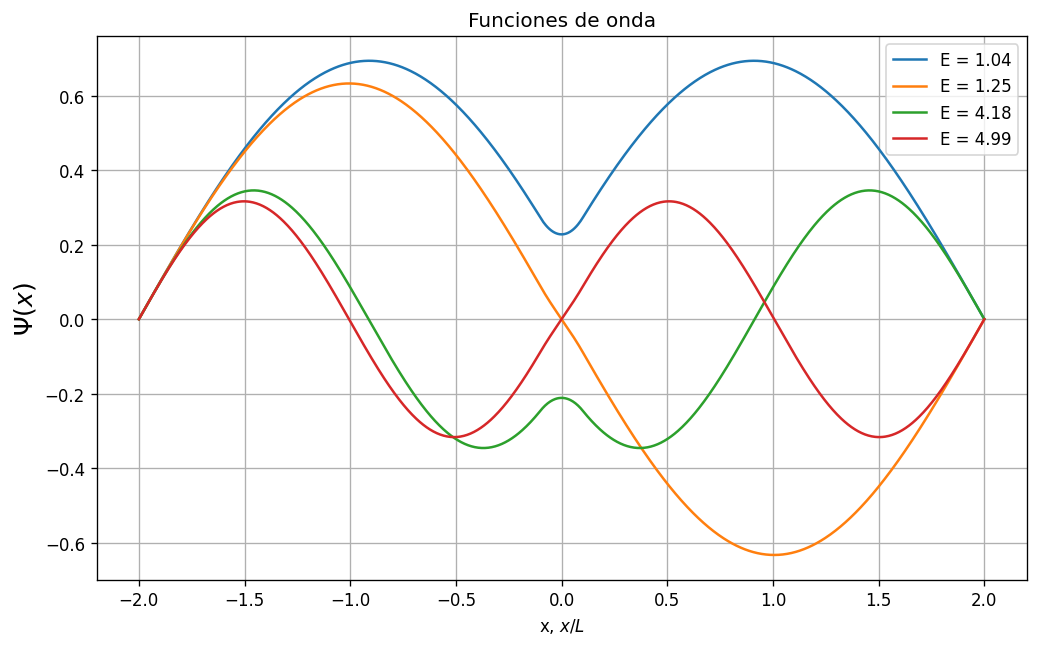

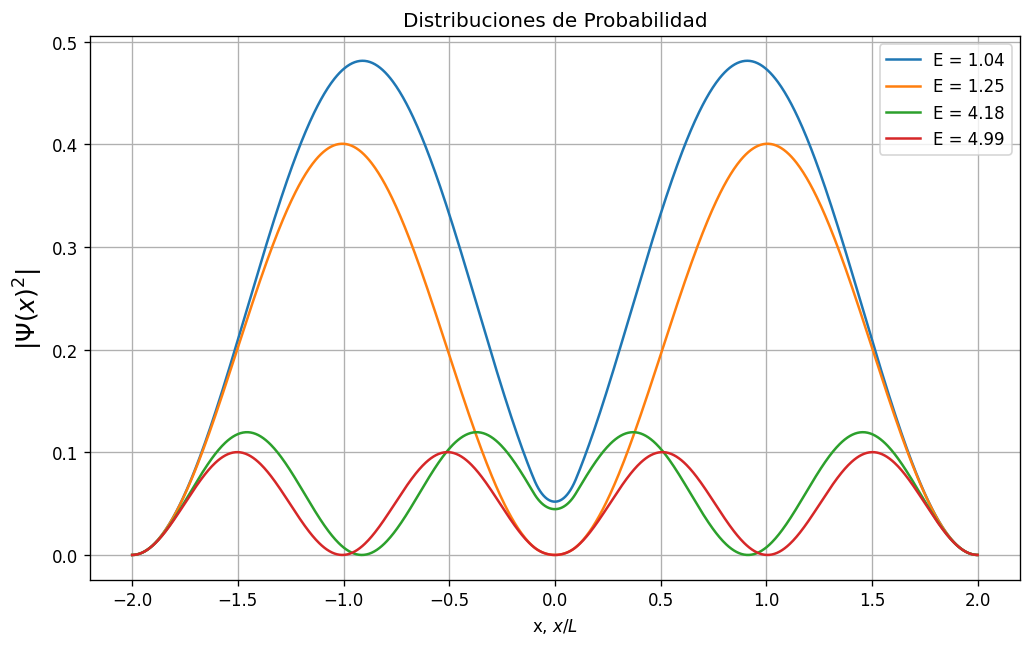

In [ ]:
"""
Proyecto Final - Física Computacional

Wagner Bermúdez Ordóñez
Valentina Campos Aguilar 
Luis Alfredo Guerrero Camacho 
Sebastián Jiménez Carranza

ELECTRÓN CONFINADO EN POZO DE POTENCIAL FINITO

"""
#Se importan las bibliotecas necesarias para la resolución del método.
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import brentq
import matplotlib.pyplot as plt

  
#Se define el ancho del pozo.
L = 0.2
#Se define la altura, o el potencial del pozo finito. 
V0 = 20
#Se define un valor de energía inicial en 0.
E = 0.0 
#Se define una posición arbitraria en x para evaluar si la función de onda diverge en los extremos.              
posx = 2      
#Se define el número de puntos.
N = 1000  
#Se crea el arreglo de posiciones x de la región espacial a estudiar.                
x = np.linspace(-posx, posx, N)
#Se definen los valores de la función de onda donde la primera entrada de los arreglos corresponde
#a la función y la segunda entrada a su derivada.         
func = np.zeros([N,2])
#Se definen los estados iniciales de la función de onda.     
func0 = np.array([0,1]) 

'''Se crea la función que permite definir el valor del potencial según la región en la que 
se encuentre el electrón considerando que este valdrá 0 fuera del pozo y V0 dentro de este.
La misma tendrá como parámetro:
    - arreglo de posiciones x a analizar
Se retornará el valor del potencial según sea el caso. '''

def Potencial(x):
    #Potencial para dentro del pozo:
    if -L/2 < x < L/2:
        return V0
    #Potencial para fuera del pozo:
    else:
        return 0
    
    
''' Se crea la función que permite redefinir la función de onda en una representación espacial de
estados, donde se tiene de parámetros:
    - la función de onda 
    - arreglo de posiciones x a analizar
La misma retorna el arreglo de estados'''

def Sistema_Ecuaciones(func, x):
    #Se define el primer estado como la primera derivada de la función de onda, esto corresponde
    #con la segunda entrada de los arreglos de la matriz de función de onda definida inicialmete.
    state0 = func[1]
    #Se define el segundo estado como la segunda derivada de la función de onda.
    #Se llama la primera entrada de los arreglos de la matriz de función de onda definida inicialmente
    #que corresponde al valor de esta función. 
    state1 = 2*(Potencial(x)-E)*func[0] 
    #Se crea el arreglo de vectores de estado que almacena el primer y segundo estado.
    vector_estados = np.array([state0, state1])
    return vector_estados


'''Se crea la función que calcula la función de onda para un valor de energía dado siendo este
el parámetro de la función.
Se retornan los valores que toma la función de onda para el valor límite x definido por 'posx'. '''
  
def Función_Onda(energía):
    #Se utiliza la función de global para editar las variables globales de energía y la función
    #de onda inicialmente definidas dentro de esta función.
    global func
    global E
    #Se le asigna a la variable global de energía el valor de energía para el que se quiere calcular
    #la función de onda. 
    E = energía
    #Se aproxima la función de onda con la función odeint de Scipy que resuelve las ecuaciones
    #diferenciales para el estado inicial definido y el arreglo de posiciones x para el que tiene que reportarse la solución.
    func = odeint(Sistema_Ecuaciones, func0, x)
    return func[-1,0]


'''Una vez obtenidos los valores de la función de onda en la posición x límite definida para una serie 
de energías se busca si en dichos estados la función diverge. Para esto la función busca para
qué valores de energía la función de onda se hace cero. 
Esta tendrá como parámetros:
    -el arreglo de energías
    -el arreglo de valores de la función de onda para cada energía en la posición x límite
 Se retorna la lista de valores de energía para los que la función de onda se vuelve 0, que son
 los valores permitidos de energía'''
    
def Ceros_Función(valorese,valoresfx):
    soluciones = []
    #Se crea el arreglo con los signos de los valores que toma la función de onda para los valores
    #de energía y la posición límite x.
    s = np.sign(valoresfx)
    #Se recorre la longitud del arreglo de los valores de la función de onda.
    for i in range(len(valoresfx)-1):
        #Cuando la suma de los signos de la posición actual y siguiente son 0 entonces se utiliza
        #el método de Brent para obtener para qué valores de energía la función de onda se hace cero.
        if s[i]+s[i+1] == 0:
            cero = brentq(Función_Onda, valorese[i], valorese[i+1])
            soluciones.append(cero)
    #Se almacenan las energías permitidas en una lista.
    return soluciones


''' Se crea la función principal del modelo que se encargará de aproximar la función de onda para
un arreglo de energías determinadas y determinar cuales de estas corresponderan a estados energéticos
permitidos. La misma no tiene parámetros y retornará 3 gráficas:
    - gráfico de valores de la función de onda en la posición x límite en función de la energía
    - gráfica de funciones de onda para energías permitidas
    - gráfica de distribución de probabilidad que sigue el movimiento del electrón en el pozo finito'''
    
def Principal():
    #Se crea el arreglo de valores de energía a probar.
    energías = np.linspace(0, V0, 100)
    func_posx = []
    #Se recorre el arreglo de energías y se aproxima el valor de la función de onda para cada una
    #de estas.
    for i in energías:
        valor_func = Función_Onda(i)
        #Los valores obtenidos para la función de onda se almacenan en una lista.
        func_posx.append(valor_func)
    
    #Se buscan cuáles energías en el arreglo definido son estados energéticos permitidos del electrón.
    energías_posibles = Ceros_Función(energías, func_posx)
    
    #Se crea una gráfica de valores de la función de onda evaluada en la posición límite en función de la energía 
    fig, ax = plt.subplots(figsize = (10,6), dpi=120)
    ax.plot(energías/V0, func_posx)
    ax.set_title(" Valores de $\Psi(x)$ en función de la energía")
    ax.set_xlabel(" Energía, $E/V_0$ ")
    ax.set_ylabel("$\Psi(x-lim)$")
    for j in energías_posibles:
        ax.plot(j/V0, [0], 'go')
        #ax.annotate("E = %.2f"%j, xy = (j/V0, 0), xytext=(j/V0, 30))
    ax.grid()
    plt.show  
    
    #Se crea una gráfica de las funciones de onda para 4 energías permitidas.
    fig, ax = plt.subplots(figsize = (10,6), dpi=120)
    for k in energías_posibles[0:4]:
        Función_Onda(k)
        ax.plot(x, func[:,0], label="E = %.2f"%k)
    ax.legend(loc="upper right")
    ax.set_title('Funciones de onda')
    ax.set_xlabel('x, $x/L$')
    ax.set_ylabel('$\Psi(x)$', fontsize = 15)
    ax.grid()
    plt.show
    
    #Se crea un gráfico que muestra la distribución de probabilidad que sigue el movimiento del electrón
    #para cada una de las energías permitidas valoradas.
    fig, ax = plt.subplots(figsize = (10,6), dpi=120)
    for k in energías_posibles[0:4]:
        Función_Onda(k)
        ax.plot(x, (func[:,0])**2, label="E = %.2f"%k)
    ax.legend(loc="upper right")
    ax.set_title('Distribuciones de Probabilidad')
    ax.set_xlabel('x, $x/L$')
    ax.set_ylabel('|$\Psi(x)^2|$', fontsize = 15)
    ax.grid()
    plt.show
    
#Se llama a la función principal para que ejecute el programa    
Principal() 